In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
kc_data = pd.read_csv('../../data/processed/home_data.csv', index_col=0) #<-Load w/out the unnecessary 'Unnamed:0' column.
kc_data.head(2)

,Major,Minor,SalePrice,DocumentDate,ZipCode,Stories,BldgGrade,Condition,Bedrooms,Bathrooms,...,SqFtEnclosedPorch,SqFtDeck,HeatSystem,SqFtLot,Township,DistrictName,StreetSurface,InadequateParking,TrafficNoise,OtherNuisances
0,638580,110,190000,07/14/2015,98188,1.0,7.0,3.0,4.0,2.0,...,0.0,300.0,5.0,10534.0,23.0,SeaTac,1.0,2.0,0.0,0.0
1,126320,110,375000,10/30/2017,98106,2.0,6.0,3.0,3.0,1.0,...,0.0,0.0,4.0,4760.0,24.0,SEATTLE,1.0,0.0,0.0,0.0


In [3]:
kc_data['ZipCode'].value_counts()

98042         4423
98023         4035
98038         3808
98058         3621
98115         3476
              ... 
98018            1
98028-2118       1
98028-4505       1
98074-4417       1
98074-6745       1
Name: ZipCode, Length: 141, dtype: int64

In [4]:
kc_data['ZipCode'] = kc_data['ZipCode'].str.split('-').str[0]
kc_data['ZipCode'].value_counts()

98042    4432
98023    4037
98038    3809
98058    3622
98115    3476
         ... 
            1
95059       1
91844       1
98088       1
98063       1
Name: ZipCode, Length: 115, dtype: int64

In [5]:
kc_data['ZipCode'].describe()

count     141551
unique       115
top        98042
freq        4432
Name: ZipCode, dtype: object

In [6]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141551 entries, 0 to 141550
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Major              141551 non-null  int64  
 1   Minor              141551 non-null  int64  
 2   SalePrice          141551 non-null  int64  
 3   DocumentDate       141551 non-null  object 
 4   ZipCode            141551 non-null  object 
 5   Stories            141551 non-null  float64
 6   BldgGrade          141551 non-null  float64
 7   Condition          141551 non-null  float64
 8   Bedrooms           141551 non-null  float64
 9   Bathrooms          141551 non-null  float64
 10  SqFtTotLiving      141551 non-null  float64
 11  SqFtTotBasement    141551 non-null  float64
 12  SqFtOpenPorch      141551 non-null  float64
 13  SqFtEnclosedPorch  141551 non-null  float64
 14  SqFtDeck           141551 non-null  float64
 15  HeatSystem         141551 non-null  float64
 16  Sq

In [7]:
kc_data['ZipCode'].describe()

count     141551
unique       115
top        98042
freq        4432
Name: ZipCode, dtype: object

In [8]:
kc_data['ZipCode'] = kc_data['ZipCode'].astype(str).str.replace(',', '')

In [9]:
kc_data['ZipCode'] = kc_data['ZipCode'].astype(str).str.replace(' ', '')

In [10]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141551 entries, 0 to 141550
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Major              141551 non-null  int64  
 1   Minor              141551 non-null  int64  
 2   SalePrice          141551 non-null  int64  
 3   DocumentDate       141551 non-null  object 
 4   ZipCode            141551 non-null  object 
 5   Stories            141551 non-null  float64
 6   BldgGrade          141551 non-null  float64
 7   Condition          141551 non-null  float64
 8   Bedrooms           141551 non-null  float64
 9   Bathrooms          141551 non-null  float64
 10  SqFtTotLiving      141551 non-null  float64
 11  SqFtTotBasement    141551 non-null  float64
 12  SqFtOpenPorch      141551 non-null  float64
 13  SqFtEnclosedPorch  141551 non-null  float64
 14  SqFtDeck           141551 non-null  float64
 15  HeatSystem         141551 non-null  float64
 16  Sq

In [11]:
kc_data['ZipCode']

0         98188
1         98106
2         98019
3         98038
4         98070
          ...  
141546    98029
141547    98004
141548    98052
141549    98052
141550    98030
Name: ZipCode, Length: 141551, dtype: object

In [12]:
zipcode = kc_data['ZipCode'].str.contains('.')
zipcode

0         True
1         True
2         True
3         True
4         True
          ... 
141546    True
141547    True
141548    True
141549    True
141550    True
Name: ZipCode, Length: 141551, dtype: bool

In [13]:
len(zipcode)

141551

In [14]:
kc_data['ZipCode'] = kc_data['ZipCode'].astype(str).str.replace('.', '')

In [15]:
zipcode = kc_data['ZipCode'].str.contains('.')
zipcode

0         True
1         True
2         True
3         True
4         True
          ... 
141546    True
141547    True
141548    True
141549    True
141550    True
Name: ZipCode, Length: 141551, dtype: bool

In [16]:
kc_data['ZipCode'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
141546    False
141547    False
141548    False
141549    False
141550    False
Name: ZipCode, Length: 141551, dtype: bool

In [17]:
kc_data.describe()

,Major,Minor,SalePrice,Stories,BldgGrade,Condition,Bedrooms,Bathrooms,SqFtTotLiving,SqFtTotBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,SqFtLot,Township,StreetSurface,InadequateParking,TrafficNoise,OtherNuisances
count,141551.000000,141551.00000,1.415510e+05,141551.000000,141551.000000,141551.000000,141551.000000,141551.000000,141551.000000,141551.000000,141551.000000,141551.000000,141551.000000,141551.000000,1.415510e+05,141551.000000,141551.000000,141551.000000,141551.000000,141551.000000
mean,448731.030470,1563.00320,6.942869e+05,1.440368,7.577573,3.565203,3.402046,2.495878,2089.849390,499.500498,65.866945,6.482406,140.722263,4.912971,4.588788e+04,23.792435,1.022437,1.236247,0.225700,0.029092
std,286623.081012,2851.22177,8.054455e+05,0.507267,1.190632,0.744944,0.950776,1.006223,956.886428,590.800333,121.866814,42.291022,218.453938,1.044610,8.046099e+05,1.650147,0.180089,0.971078,0.580267,0.168065
min,100.000000,1.00000,1.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.750000e+02,19.000000,0.000000,0.000000,0.000000,0.000000
25%,202504.000000,115.00000,3.790000e+05,1.000000,7.000000,3.000000,3.000000,2.000000,1420.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.500000e+03,23.000000,1.000000,0.000000,0.000000,0.000000
50%,383206.000000,326.00000,5.560000e+05,1.000000,7.000000,3.000000,3.000000,3.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,5.000000,7.980000e+03,24.000000,1.000000,2.000000,0.000000,0.000000
75%,722924.000000,1017.00000,8.000000e+05,2.000000,8.000000,4.000000,4.000000,3.000000,2550.000000,990.000000,90.000000,0.000000,220.000000,5.000000,1.140000e+04,25.000000,1.000000,2.000000,0.000000,0.000000
max,990600.000000,9689.00000,6.250000e+07,4.000000,13.000000,5.000000,15.000000,16.000000,14980.000000,5330.000000,11570.000000,2330.000000,4290.000000,8.000000,2.330525e+07,26.000000,4.000000,2.000000,3.000000,1.000000


In [18]:
for column in list(kc_data.columns):
    print(column, sum(kc_data[column].isnull()))

Major 0
Minor 0
SalePrice 0
DocumentDate 0
ZipCode 0
Stories 0
BldgGrade 0
Condition 0
Bedrooms 0
Bathrooms 0
SqFtTotLiving 0
SqFtTotBasement 0
SqFtOpenPorch 0
SqFtEnclosedPorch 0
SqFtDeck 0
HeatSystem 0
SqFtLot 0
Township 0
DistrictName 0
StreetSurface 0
InadequateParking 0
TrafficNoise 0
OtherNuisances 0


In [19]:
df = kc_data[kc_data['ZipCode'].apply(lambda x: not x.isnumeric())]

In [20]:
df

,Major,Minor,SalePrice,DocumentDate,ZipCode,Stories,BldgGrade,Condition,Bedrooms,Bathrooms,...,SqFtEnclosedPorch,SqFtDeck,HeatSystem,SqFtLot,Township,DistrictName,StreetSurface,InadequateParking,TrafficNoise,OtherNuisances
24179,982870,2305,1330000,12/29/2015,Aonplans,3.0,10.0,3.0,3.0,4.0,...,70.0,600.0,7.0,1424.0,25.0,SEATTLE,1.0,2.0,0.0,0.0
26953,312606,9112,322000,04/30/2018,,1.0,7.0,3.0,2.0,1.0,...,0.0,0.0,5.0,77536.0,26.0,KING COUNTY,1.0,2.0,2.0,0.0
67461,982870,2305,1900000,02/22/2016,Aonplans,3.0,10.0,3.0,3.0,4.0,...,70.0,600.0,7.0,1424.0,25.0,SEATTLE,1.0,2.0,0.0,0.0


In [21]:
kc_data = kc_data.drop(index=[24179,26953,67461])

In [23]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141548 entries, 0 to 141550
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Major              141548 non-null  int64  
 1   Minor              141548 non-null  int64  
 2   SalePrice          141548 non-null  int64  
 3   DocumentDate       141548 non-null  object 
 4   ZipCode            141548 non-null  object 
 5   Stories            141548 non-null  float64
 6   BldgGrade          141548 non-null  float64
 7   Condition          141548 non-null  float64
 8   Bedrooms           141548 non-null  float64
 9   Bathrooms          141548 non-null  float64
 10  SqFtTotLiving      141548 non-null  float64
 11  SqFtTotBasement    141548 non-null  float64
 12  SqFtOpenPorch      141548 non-null  float64
 13  SqFtEnclosedPorch  141548 non-null  float64
 14  SqFtDeck           141548 non-null  float64
 15  HeatSystem         141548 non-null  float64
 16  Sq

In [24]:
df = kc_data[kc_data['ZipCode'].apply(lambda x: not x.isnumeric())]

In [25]:
df

,Major,Minor,SalePrice,DocumentDate,ZipCode,Stories,BldgGrade,Condition,Bedrooms,Bathrooms,...,SqFtEnclosedPorch,SqFtDeck,HeatSystem,SqFtLot,Township,DistrictName,StreetSurface,InadequateParking,TrafficNoise,OtherNuisances


In [31]:
kc_data['ZipCode']= kc_data['ZipCode'].astype(np.int64)

In [32]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141548 entries, 0 to 141550
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Major              141548 non-null  int64  
 1   Minor              141548 non-null  int64  
 2   SalePrice          141548 non-null  int64  
 3   DocumentDate       141548 non-null  object 
 4   ZipCode            141548 non-null  int64  
 5   Stories            141548 non-null  float64
 6   BldgGrade          141548 non-null  float64
 7   Condition          141548 non-null  float64
 8   Bedrooms           141548 non-null  float64
 9   Bathrooms          141548 non-null  float64
 10  SqFtTotLiving      141548 non-null  float64
 11  SqFtTotBasement    141548 non-null  float64
 12  SqFtOpenPorch      141548 non-null  float64
 13  SqFtEnclosedPorch  141548 non-null  float64
 14  SqFtDeck           141548 non-null  float64
 15  HeatSystem         141548 non-null  float64
 16  Sq

In [33]:
kc_data.describe()

,Major,Minor,SalePrice,ZipCode,Stories,BldgGrade,Condition,Bedrooms,Bathrooms,SqFtTotLiving,...,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,SqFtLot,Township,StreetSurface,InadequateParking,TrafficNoise,OtherNuisances
count,141548.000000,141548.000000,1.415480e+05,1.415480e+05,141548.000000,141548.000000,141548.000000,141548.000000,141548.000000,141548.000000,...,141548.000000,141548.000000,141548.000000,141548.000000,1.415480e+05,141548.000000,141548.000000,141548.000000,141548.000000,141548.000000
mean,448724.445050,1562.939385,6.942765e+05,1.050153e+05,1.440349,7.577543,3.565215,3.402061,2.495867,2089.858500,...,65.867635,6.481554,140.716767,4.912941,4.588828e+04,23.792403,1.022438,1.236231,0.225690,0.029093
std,286618.857647,2851.180018,8.054453e+05,2.607682e+06,0.507237,1.190609,0.744947,0.950777,1.006210,956.893955,...,121.867820,42.290792,218.449111,1.044592,8.046184e+05,1.650148,0.180091,0.971082,0.580254,0.168067
min,100.000000,1.000000,1.000000e+00,3.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,3.750000e+02,19.000000,0.000000,0.000000,0.000000,0.000000
25%,202504.000000,115.000000,3.790000e+05,9.803200e+04,1.000000,7.000000,3.000000,3.000000,2.000000,1420.000000,...,0.000000,0.000000,0.000000,5.000000,5.500000e+03,23.000000,1.000000,0.000000,0.000000,0.000000
50%,383206.000000,326.000000,5.560000e+05,9.805900e+04,1.000000,7.000000,3.000000,3.000000,3.000000,1910.000000,...,0.000000,0.000000,0.000000,5.000000,7.980000e+03,24.000000,1.000000,2.000000,0.000000,0.000000
75%,722921.000000,1017.000000,8.000000e+05,9.811800e+04,2.000000,8.000000,4.000000,4.000000,3.000000,2550.000000,...,90.000000,0.000000,220.000000,5.000000,1.140000e+04,25.000000,1.000000,2.000000,0.000000,0.000000
max,990600.000000,9689.000000,6.250000e+07,9.811820e+08,4.000000,13.000000,5.000000,15.000000,16.000000,14980.000000,...,11570.000000,2330.000000,4290.000000,8.000000,2.330525e+07,26.000000,4.000000,2.000000,3.000000,1.000000


In [34]:
kc_data['ZipCode']

0         98188
1         98106
2         98019
3         98038
4         98070
          ...  
141546    98029
141547    98004
141548    98052
141549    98052
141550    98030
Name: ZipCode, Length: 141548, dtype: int64

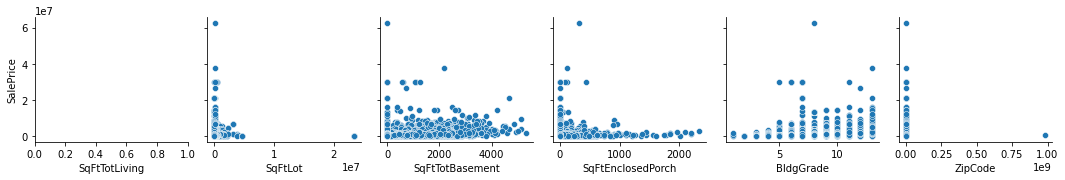

In [39]:
sns.pairplot(kc_data,
            x_vars=["SqFtTotLiving", "SqFtLot", "SqFtTotBasement", "SqFtEnclosedPorch", "BldgGrade", "ZipCode"],
            y_vars=["SalePrice"])

In [38]:
kc_data['SqFtTotLiving']= kc_data['SqFtTotLiving'].astype(np.int64)

In [43]:
kc_data['SqFtTotBasement'].value_counts()

0.0       72349
1010.0     1379
1060.0     1166
1200.0     1014
1100.0     1007
          ...  
1706.0        1
858.0         1
2810.0        1
415.0         1
1066.0        1
Name: SqFtTotBasement, Length: 754, dtype: int64

In [44]:
kc_data['SqFtTotBasement']= kc_data['SqFtTotBasement'].astype('float64')

In [45]:
date = kc_data['DocumentDate'].str.split('/', expand=True)
kc_data['month_sold'] = date[0].astype('float64')
kc_data['year_sold'] = date[2].astype('float64')

#Drop original date column
kc_data.drop(columns=['DocumentDate'], axis=1, inplace=True)